# Ising Model - 3D : Monte Carlo Simulation

First of all we import the required libraries:

In [59]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

### Global parameters

Then we set some global variables:

In [60]:
Kb = 1.0
JJ = 1.0
mu = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [61]:
def cold_start(L):
    U = [[[1.0 for k in range(L)]for l in range(L)] for r in range(L)]
    return U   

We can make a plot of this cold configuration by the help of Uplotter :

In [62]:
CU = cold_start(10)

 if we select spin randomly up or down then it is called cold configuration

In [63]:
def hot_start(L): 
    U = [[[0.0 for i in range(L)]for j in range(L)]for r in range(L)]
    for i in range(L):
          for j in range(L):
                for r in range(L):
                    t = random.sample([-1,1],1)
                    U[i][j][r] = t[0]  
    return U 

Similarly we can plot thishot configuration as well.

In [64]:
HU = hot_start(10)


### Hamiltonian

Hamiltonian of  L by L lattice is given by

\\( H = - J \sum_{i\neq j} S_{i}S_{j} - \mu B \sum_{i} S_{i} \\)

In [65]:
def Hamiltonian(U,B):
    H = 0.0
    L = len(U)
    for i in range(L):
        for j in range(L):
            for r in range(L):
                
                ni = 0;nj =0;nr=0;
                if i == 0: ni = L
                if j == 0: nj = L
                if r == 0: nr=L
           
                H = H -  0.5*JJ*U[i][j][r]*(U[i][(j-1)+nj][r] \
                            + U[(i+1)%L][j][r] \
                            + U[i][(j+1)%L][r] \
                            + U[(i-1)+ni][j][r] \
                            + U[i][j][(r+1)%L] \
                            + U[i][j][(r-1)+nr]) \
                            - mu*B*U[i][j][r]
    return H

One can check what are hamiltonian for hot and cold start:

In [66]:
Hamiltonian(CU, B=1)

-4000.0

In [67]:
Hamiltonian(HU, B=0)

-104.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [68]:
def magnetization(U):
    return np.array(U).sum()/float((len(U)*len(U)*len(U)))          

In [69]:
magnetization(HU)

0.026

In [70]:
magnetization(CU)

1.0

### Spin Flipper

In [71]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [72]:
def spin_flipper(U,B, printkey):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
        r = random.randint(0, L-1)
       
        if printkey ==1:print("flipped at", i,j,r)
            
        U[i][j][r] = -U[i][j][r]
       
           
        dH =  -2.0*JJ*U[i][j][r]*(U[i][(j-1)+ld(j,L)][r] \
                            + U[(i+1)%L][j][r] \
                            + U[i][(j+1)%L][r] \
                            + U[(i-1)+ld(i,L)][j][r] \
                            + U[i][j][(r+1)%L] \
                            + U[i][j][(r-1)+ld(r,L)]) \
                            - 2.0*mu*B*U[i][j][r]   
        
        return U,dH,i,j,r

### Thermalization

In [73]:
def Thermalization(U,T,nrun,printkey) :
        M = [0.0 for k in range(nrun)]
        irun = 0       
        B = 0.0
        HH = [0.0 for k in range(nrun)]
       
        while irun < nrun:
                    V = U
                    w = magnetization(U)
                    h = Hamiltonian(U,B)
                    
                    U,dH,p,q,l = spin_flipper(U,B,printkey)
                   
                   
                    if dH < 0:
                        
                        if printkey ==1: print(irun, "E decreased! You are accepted !",dH)
                            
                        M[irun] = magnetization(U)
                        HH[irun] = Hamiltonian(U,B)
                       
                    else:
                        
                        if printkey ==1:print(irun, "E increased!",dH)
                            
                        frac = math.exp(-dH/(Kb*T))
                        b = random.uniform(0.0,1.0)
                            
                        if printkey ==1:print("frac =",frac,"b=",b,"dH = ",dH)
                                
                        if  b < frac:
                                    
                            if printkey ==1:print(irun, " You Lucky!")
                                
                            M[irun] = magnetization(U)
                            HH[irun] = Hamiltonian(U,B)
                             
                        else:
                            if printkey ==1: print(irun, "Loser!")
                            if printkey ==1: print("spin restablished at",p,q,l)
                            U[p][q][l] = -U[p][q][l]
                            M[irun] = w 
                            HH[irun] = h
                           
                            
                    for i in range(L):
                        for j in range(L):
                            for r in range(L):
                                if U[i][j][r] != V[i][i][r]:
                                     if printkey ==1: print("Warning!spin is changed!", i,j,r) 
                            
                    
                    
                    
                    if printkey ==2 : print(irun, M[irun])   
                    irun = irun +1
        return M,U,HH

Lets print out some measurements of m

In [74]:
nrun = 20
T = 1.0
L = 10
U = cold_start(L)  
M,U,HH = Thermalization(U,T,nrun, 1)

flipped at 7 7 4
0 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.8758720931108844 dH =  12.0
0 Loser!
spin restablished at 7 7 4
flipped at 9 7 7
1 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.5466830464381338 dH =  12.0
1 Loser!
spin restablished at 9 7 7
flipped at 5 4 8
2 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.6620537481282538 dH =  12.0
2 Loser!
spin restablished at 5 4 8
flipped at 4 9 4
3 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.0767940984955311 dH =  12.0
3 Loser!
spin restablished at 4 9 4
flipped at 4 8 9
4 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.2753633382695324 dH =  12.0
4 Loser!
spin restablished at 4 8 9
flipped at 5 3 2
5 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.5878649178396245 dH =  12.0
5 Loser!
spin restablished at 5 3 2
flipped at 0 0 6
6 E increased! 12.0
frac = 6.14421235332821e-06 b= 0.6355004562400514 dH =  12.0
6 Loser!
spin restablished at 0 0 6
flipped at 7 6 3
7 E increased! 12.0
frac = 6.14421235332821e-

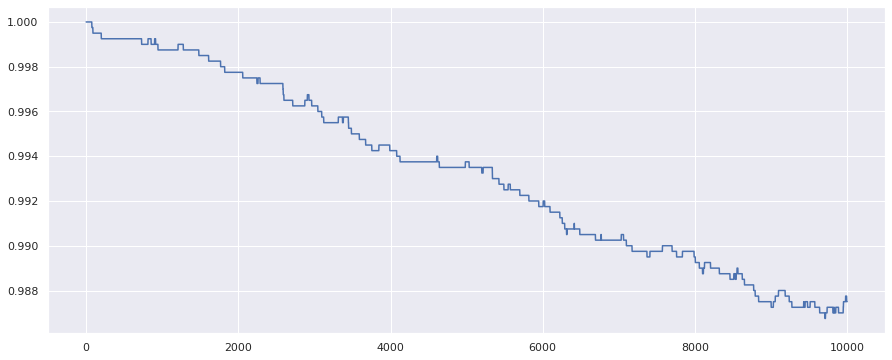

In [75]:
L = 20
nrun = 10000
T = 2.4
U = cold_start(L) 
M,U,HH = Thermalization(U,T,nrun, 0)
X = np.arange(0,len(M),1)
plt.figure(figsize = [15,6])
plt.plot(X,M,"-")
plt.show() 

We can plot both run with hot and cold start together:

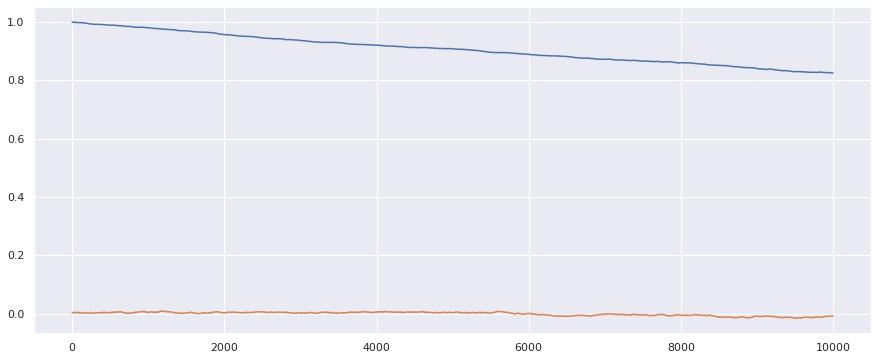

In [76]:
L =20
nrun = 10000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1,HH = Thermalization(U1,T,nrun,0)
M2,U2,HH = Thermalization(U2,T,nrun,0)
X = np.arange(0,len(M1),1)

plt.figure(figsize = [15,6])
plt.plot(X,M1,"-")
plt.plot(X,M2,"-")
plt.show()


### Phase Transition

In [77]:
L = 10
nrun = 3000
Tn = 100
avm = []
stdh = []
KT = []

for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,0)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))

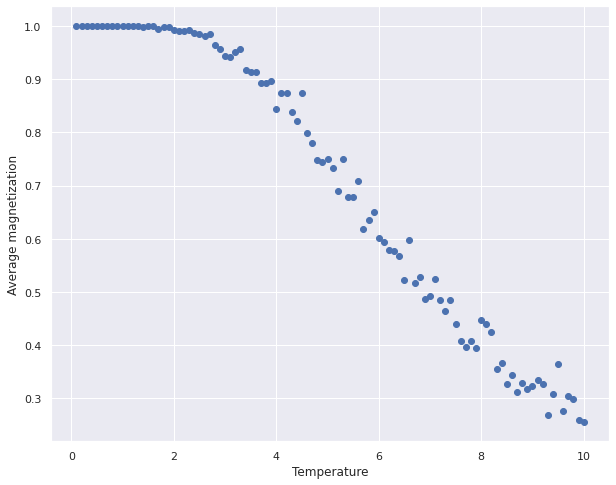

In [78]:
plt.figure(figsize = [10,8])
plt.scatter(KT,avm)
plt.xlabel("Temperature")
plt.ylabel("Average magnetization")
plt.show() 

#### Specific Heat Capacity

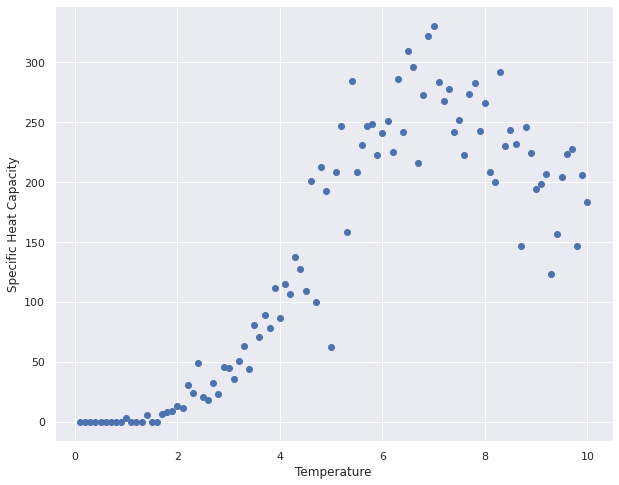

In [79]:
plt.figure(figsize = [10,8])
plt.scatter(KT,stdh)
plt.xlabel("Temperature")
plt.ylabel("Specific Heat Capacity")
plt.show() 

### References

1. http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf
2. http://physics.drexel.edu/~valliere/PHYS305/Monte_Carlo/Monte_Carlo_story/node12.html
3. https://www.ibiblio.org/e-notes/Perc/ising.htm
4. https://arxiv.org/abs/2002.00615
5. http://farside.ph.utexas.edu/teaching/329/lectures/node110.html